# Tensor Train

## Introduction and motivations for tensor train

### what is a tensor ?
- A point is a 0-dimensional tensor (aka tensor of order 0)
- A vector is a 1-dimensional tensor (aka tensor of order 1)
- A matrix is a 2-dimensional tensor (aka tensor of order 2)
- A 3-dimensional tensor is a tensor of order 3. Example: a color RGB image is a 3-dimensional tensor
- A 4-dimensional tensor is a tensor of order 4. Example: a batch of color RGB images is a 4-dimensional tensor, or a video.
- etc.
### Tensor Train overview
A tensor $A∈\mathbb{R}^{n_1 \times \cdots n_d}$ is represented in the **TT format** as:
$$A(i_1,\cdots,i_d) = G_1(i_1)\cdots G_d(i_d) $$
Each $G_k(i_k)\in \mathbb{R}^{r_{k-1}}\times r_k$ is called a **TT-core** , where $r_0=1,r_d=1$, and $r_k$ are the TT-ranks .

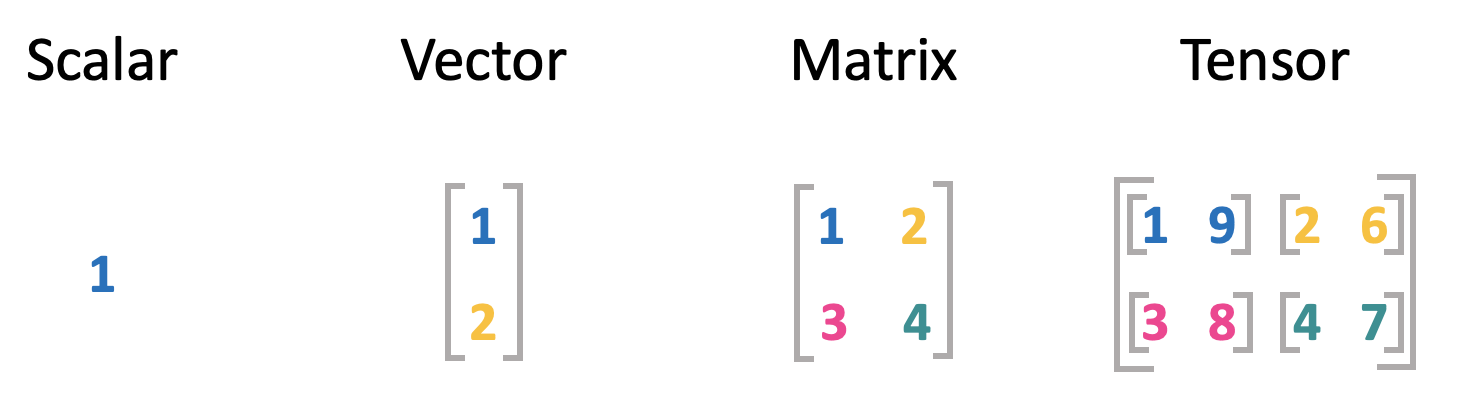

In [18]:
# !pip install tensorly

In [1]:
import numpy as np 
import torch as tl
np.random.seed(1)
import sys 
sys.path.append('../src/')
from lib import*

In [20]:
!pip install "numpy<2"

In [21]:
tensor_scalar = tl.tensor(1)
tensor_vector = tl.tensor([1, 2, 3])
tensor_matrix = tl.tensor([[1, 2, 3], [4, 5, 6]])
tensor_3d = tl.tensor(np.random.rand(3, 4, 5))
tensor_4d = tl.tensor(np.random.rand(3, 4, 5, 6))

print(f" 0 dimensional shape is {tensor_scalar.shape}, the number of its elements is {tensor_scalar.size}, and its order is {tensor_scalar.ndim}")
print(f" 1 dimensional shape is {tensor_vector.shape}, the number of its elements is {tensor_vector.size}, and its order is {tensor_vector.ndim}")
print(f" 2 dimensional shape is {tensor_matrix.shape}, the number of its elements is {tensor_matrix.size}, and its order is {tensor_matrix.ndim}")
print(f" 3 dimensional shape is {tensor_3d.shape}, the number of its elements is {tensor_3d.size}, and its order is {tensor_3d.ndim}")
print(f" 4 dimensional shape is {tensor_4d.shape}, the number of its elements is {tensor_4d.size}, and its order is {tensor_4d.ndim}")


 0 dimensional shape is (), the number of its elements is 1, and its order is 0
 1 dimensional shape is (3,), the number of its elements is 3, and its order is 1
 2 dimensional shape is (2, 3), the number of its elements is 6, and its order is 2
 3 dimensional shape is (3, 4, 5), the number of its elements is 60, and its order is 3
 4 dimensional shape is (3, 4, 5, 6), the number of its elements is 360, and its order is 4


### Problems with high dimensional tensors
- **Curse of dimensionality and Storage**: the number of elements grows exponentially with the order of the tensor
- **Computation**: the number of operations grows exponentially with the order of the tensor
- **Visualization**: it is impossible to visualize tensors with order greater than 3

In [22]:
n,d = 10,1
while d<=10:
    d = d+1
    tensor = n**d
    print(f"For tensor of order {d} which has {n} elements in each dimension, the number of elements is {tensor}")

For tensor of order 2 which has 10 elements in each dimension, the number of elements is 100
For tensor of order 3 which has 10 elements in each dimension, the number of elements is 1000
For tensor of order 4 which has 10 elements in each dimension, the number of elements is 10000
For tensor of order 5 which has 10 elements in each dimension, the number of elements is 100000
For tensor of order 6 which has 10 elements in each dimension, the number of elements is 1000000
For tensor of order 7 which has 10 elements in each dimension, the number of elements is 10000000
For tensor of order 8 which has 10 elements in each dimension, the number of elements is 100000000
For tensor of order 9 which has 10 elements in each dimension, the number of elements is 1000000000
For tensor of order 10 which has 10 elements in each dimension, the number of elements is 10000000000
For tensor of order 11 which has 10 elements in each dimension, the number of elements is 100000000000


## What is a Tensor Train (TT)
- It decomposes a high dimensional tensor into a sequence of 3D tensors, which are called cores (TT-cores). It reduces the computational cost and storage drastically.
- For a tensor $\mathcal{T} \in \mathbb{R}^{n_1 \times n_2 \times \ldots \times n_d}$, its TT-decompositions is: 

$$\mathcal{T}(i_1,...,i_d) = G^{(1)}(i_1) \cdot G^{(2)}(i_2) \cdot \ldots \cdot G^{(d)}(i_d)$$
where each $G^{(k)}$ is a 3D tensor of size $r_{k-1} \times n_k \times r_k$ and $r_0 = r_d = 1$. The numbers $r_k$ are called TT-ranks.



In [23]:
# Reconstruction of the original tensor from a TT-decomposition
d,r = [2,3,4],[1,2,3,1]
# G1 = np.random.randn(r[0],d[0],r[1])
# G2 = np.random.randn(r[1],d[1],r[2])
# G3 = np.random.randn(r[2],d[2],r[3])
G1 = np.arange(r[0]*d[0]*r[1]).reshape(r[0],d[0],r[1])
G2 = np.arange(r[1]*d[1]*r[2]).reshape(r[1],d[1],r[2])
G3 = np.arange(r[2]*d[2]*r[3]).reshape(r[2],d[2],r[3])
tensor_reconstructed_1 = np.einsum("aib,bjc,ckd->ijk", G1, G2, G3)

tensor_reconstruced_2 = np.tensordot(np.tensordot(G1, G2, axes=([2], [0])), G3, axes=([3], [0])).reshape(d[0],d[1],d[2])
print(np.allclose(tensor_reconstructed_1, tensor_reconstruced_2))

print("einsum reconstruction: \n",tensor_reconstructed_1)
print("tensor dot reconstruction: \n",tensor_reconstruced_2)

def reconstruct_from_tt(G):
    tensor_reconstructed = G[0]
    dimensions = [x.shape[1] for x in G]
    for i in range(1, len(G)):
        tensor_reconstructed = np.tensordot(tensor_reconstructed, G[i], axes=([-1], [0]))
    return tensor_reconstructed.reshape(dimensions)
tensor_reconstructed_3 = reconstruct_from_tt([G1, G2, G3])
print(np.allclose(tensor_reconstructed_1, tensor_reconstructed_3))

True
einsum reconstruction: 
 [[[ 128  158  188  218]
  [ 164  203  242  281]
  [ 200  248  296  344]]

 [[ 424  520  616  712]
  [ 604  745  886 1027]
  [ 784  970 1156 1342]]]
tensor dot reconstruction: 
 [[[ 128  158  188  218]
  [ 164  203  242  281]
  [ 200  248  296  344]]

 [[ 424  520  616  712]
  [ 604  745  886 1027]
  [ 784  970 1156 1342]]]
True


## TT-Ranks, Compression

### TT-Ranks
- It controls the storage cost, computational complexity and accuracy of the tensor. Low TT-ranks has efficient representation but low accuracy.
- TT-ranks are the dimensions of the core tensors.
### TT compression
- TT-SVD (sequential SVD-based compression)
- TT-Cross (interpolation-approximation based compression)
### TT_SVD algorithms decomposition
For a tensor $\mathcal{T} \in \mathbb{R}^{n_1 \times n_2 \times \ldots \times n_d}$. To find the core tensors $G^{(k)}$ and the TT-ranks $r_k$,
$$\mathcal{T}(i_1,...,i_d) = G^{(1)}(i_1) \cdot G^{(2)}(i_2) \cdot \ldots \cdot G^{(d)}(i_d)$$
its TT-SVD algorithm is as follow is: 
- **Step 1**: Unfolding into mod-1 tensor 
$\mathcal{T} \rightarrow \mathcal{T}_{(1)} \in \mathbb{R}^{n_1 \times (n_2 \times \ldots \times n_d)}$

- **Step 2**: SVD on mod-1 tensor  
-- $\mathcal{T}_{(1)} = U_1 \Sigma_1 V_1^T$, where $U_1 \in \mathbb{R}^{n_1 \times r_1}$, $\Sigma_1 \in \mathbb{R}^{r_1 \times r_1}$, and $V_1 \in \mathbb{R}^{(n_2 \times \ldots \times n_d) \times r_1}$  
-- $G^{(1)} = $ reshape $U_1 $ into $r_0 \times n_1 \times r_1$ and $\mathcal{T}_{(1)}' = \Sigma_1 \cdot V_1^T$

- **Step 3**: Reshaping into mod-1,2 tensor

-- $\mathcal{T}_{(1)}' \rightarrow \mathcal{T}_{(2)}' \in \mathbb{R}^{(r_1 n_2) \times (n_3 \times \ldots \times n_d)}$ 
- **Step 4**: SVD on mod-1,2 tensor  
-- $\mathcal{T}_{(2)}' = U_2 \Sigma_2 V_2^T$, where $U_2 \in \mathbb{R}^{(r_1 n_2) \times r_2}$, $\Sigma_2 \in \mathbb{R}^{r_2 \times r_2}$, and $V_2 \in \mathbb{R}^{(n_3 \times \ldots \times n_d) \times r_2}$  
-- $G^{(2)} = $ reshape $U_2 $ into $r_1 \times n_2 \times r_2$ and $\mathcal{T}_{(2)}'' = \Sigma_2 \cdot V_2^T$
- **Step 5**: Repeat step 3 and 4 until the last mode

In [24]:
shapes = (3,4,5,6)
tensor = np.arange(np.product(shapes)).reshape(shapes)
rank = 2

modes = len(shapes)

print(f"The shape of the original tensor is {tensor.shape} with number of element {tensor.size}")


The shape of the original tensor is (3, 4, 5, 6) with number of element 360


In [25]:
!pip install tensorly

In [26]:


# SVD implementation 
import numpy as np


def reconstruct_from_tt(tt_cores):
    """
    Reconstructs a full tensor from its TT decomposition.

    Args:
        tt_cores (list of np.ndarray): List of TT cores. Each core has shape (r_prev, d_mode, r_next).

    Returns:
        np.ndarray: Reconstructed full tensor.
    """
    tensor = tt_cores[0]  # Start with first core
    for i in range(1, len(tt_cores)):
        # Contract along the bond dimension
        tensor = np.tensordot(tensor, tt_cores[i], axes=([-1], [0]))
    
    # Get original dimensions from the cores
    dimensions = [core.shape[1] for core in tt_cores]
    return tensor.reshape(dimensions)


def tt_svd(tensor, rank):
    """
    Perform TT-SVD decomposition of a full tensor.

    Args:
        tensor (np.ndarray): Input tensor of shape (d1, d2, ..., dn)
        rank (int or list): TT-ranks; if int, all intermediate ranks are set to this value

    Returns:
        list of np.ndarray: List of TT cores [G1, G2, ..., Gn]
    """
    shape = list(tensor.shape)
    n = len(shape)  # Number of dimensions

    # Handle rank input
    if isinstance(rank, int):
        rank = [rank] * n
    elif len(rank) != n:
        raise ValueError("Length of rank must match number of tensor dimensions.")

    # Prepend and append rank 1 at start/end
    tt_ranks = [1] + rank + [1]

    cores = []
    unfolding = tensor.copy()

    for i in range(n):
        if i==n-1:
            break
        curr_dim = shape[i]
        next_rank = tt_ranks[i + 1]

        # Reshape into matrix
        unfolding = unfolding.reshape(tt_ranks[i] * curr_dim, -1)

        # SVD
        U, S, Vt = np.linalg.svd(unfolding, full_matrices=False)

        # Truncate based on desired rank
        U_trunc = U[:, :next_rank]
        S_trunc = S[:next_rank]
        Vt_trunc = Vt[:next_rank, :]

        # Reshape U into TT-core
        core = U_trunc.reshape(tt_ranks[i], curr_dim, next_rank)
        cores.append(core)

        # Update unfolding with S @ Vt
        unfolding = np.diag(S_trunc) @ Vt_trunc
    unfolding = unfolding.reshape(tt_ranks[-2], shape[-1], tt_ranks[-1])
    cores.append(unfolding)
    return cores
from tensorly.decomposition import tensor_train

tt_tensor = tensor_train(tensor, rank=rank)
G = tt_svd(tensor,rank)
tensor_reconstructed_2 = reconstruct_from_tt(G)
print(f"The shape of the reconstructed tensor is {tensor_reconstructed_2.shape}")
print(f"The error is tensor and tt_svd {np.linalg.norm(tensor - tensor_reconstructed_2)}")

The shape of the reconstructed tensor is (3, 4, 5, 6)
The error is tensor and tt_svd 3.6017122230235946e-12


### Orthogonalization in TT-format
1. Left orthogonalization

We uses **QR** decomposition of the tensor to obtain the left orthogonal components.
All cores left of position k are orthogonal:
$$ \sum_{j=1}^{n_j} G_j(i)^TG_j(i) = I$$
Algorithms:  

Inputs : Cores of the TT-decomposition : $G_1$ (dim: $1\times n_1 \times r_1$), $G_2$(dim: $r_1 \times n_2 \times r_2 $),...  
**a.** Take a core $G_0$ and reshape it into $(1*n_1)\times r_1$  
**b.** Perform **SVD** decomposition( or QR) of current core (here $G_0$), i.e. $G_0=(U_0S_0V_0^T)$ where $Q=U_0:(n_1\times s_1)$ and $R=S_0V_0^T: (s_1 \times r_1)$ and takes the 1st core as $Q:$ reshape$(1,n_1,s_1)$  
**c.** Multiply $R$ to the next cores $G_1$, the result will be of shape $(s_1,n_2,r_2)$.  Reshape it into $(s_1*n_2,r_2)$
**d.** Perform **SVD** decomposition(seen as QR) of current core (here $G_1$), i.e. $G_1=(U_1S_1V_1^T)$ where $Q=U_1:((s_1*n_2)\times s_2)$ and $R=S_1V_1^T: (s_2 \times r_2)$ and takes the 2nd core as $Q:$ reshape$(s_1,n_2,s_2)$
**e.** Multiply $R$ to the next cores $G_2$, the result will be of shape $(s_2,n_3,r_3)$.  Reshape it into $(s_2*n_3,r_3)$
**f.** Repeat the steps until the last core.
The output will be a list of orthogonal cores.


2. Right orthogonalization

We uses **QR** decomposition of the transpose of the tensor to obtain the transpose of orthogonal components.
All cores left of position k are orthogonal:
$$ \sum_{j=1}^{n_j} G_j(i)G_j(i)^T = I$$

In [27]:



# Define TT cores manually
tt_cores = [
    np.random.randn(1, 3, 5),   # Core 0
    np.random.randn(5, 4, 6),   # Core 1
    np.random.randn(6, 2, 1)    # Core 2
]

# Left orthogonalization
tt_cores_left = tt_orthogonalize(tt_cores.copy(), types="svd", left_right="right")

# Right orthogonalization
tt_cores_right = right_orthogonalize(tt_cores.copy())


for core in tt_cores_left:
    print(is_left_orthogonal(core))
tensor_reconstructed_left = reconstruct_from_tt(tt_cores_left)

tensor_reconstructed = reconstruct_from_tt(tt_cores)

error = np.linalg.norm(tensor_reconstructed - tensor_reconstructed_left)
relative_error = error / np.linalg.norm(tensor_reconstructed)

print("Absolute error:", error)
print("Relative error:", relative_error)

# tensor_reconstructed_right = reconstruct_from_tt(tt_cores_right)
# print(f"tensor_reconstructed_right.shape: {tensor_reconstructed_right.shape}")
# error = np.linalg.norm(tensor_reconstructed - tensor_reconstructed_right)
# relative_error = error / np.linalg.norm(tensor_reconstructed)

# print("Absolute error:", error)
# print("Relative error:", relative_error)

TypeError: tt_orthogonalize() got an unexpected keyword argument 'types'

In [ ]:
!pip install tensorly

In [ ]:
import tensorly as tl 
# Generate a TT tensor with size 
szY = [5, 6, 7, 8,9, 10]
szY = np.array(szY)

# and TT ranks
rankTT = [1, 2, 3, 4,3, 2, 1]
N = len(szY)

# TT-Tensor Ytt 
Ytt = tl.random.random_tt(shape=szY, rank=rankTT)

print(Ytt)
for n in range(N-1):
    """
    Perform the left orthogonalization on the core tensor n-th Yn of the TT tensor Y

    """
     
    Ytt_o = tt_orth_at(Ytt, n, 'left')

    # Check orthogonality of Ytt_o[n]
    Q = Ytt_o[n].reshape(-1,Ytt_o[n].shape[-1]).T @ Ytt_o[n].reshape(-1,Ytt_o[n].shape[-1])
    print(f'Left-Orthogonalize core {n}: orthogonality error :{np.linalg.norm(Q - np.eye(Ytt_o[n].shape[-1]))}')

factors list : rank-(1, 2, 3, 4, 3, 2, 1) matrix-product-state tensor of shape (5, 6, 7, 8, 9, 10) 
Left-Orthogonalize core 0: orthogonality error :4.3807695049943604e-16
Left-Orthogonalize core 1: orthogonality error :4.975308949793593e-16
Left-Orthogonalize core 2: orthogonality error :1.0021217702272194e-15
Left-Orthogonalize core 3: orthogonality error :5.695747258139164e-16
Left-Orthogonalize core 4: orthogonality error :2.2581277788700136e-16


# DMD with tensor algorithms :


## DMD with tensor algorithms and its Similarity with **DMD** algorithms on matrix:
- Given a sequence of d-dimensional tensors  $X_i​∈\mathbb{R}^{n_1​×n_2​×⋯×_{n_d}}$​, stack them into two large tensor datasets $\mathcal{X}$ and $\mathcal{Y}$.
- Compute a low-rank TT-format decomposition  of these tensor datasets.
- Use properties of the TT-decomposition to compute the pseudoinverse  of the tensor unfolding $\mathcal{X}=\text{matricize}(\mathcal{X})$ without explicitly forming the full matrix.
- Compute the DMD operator $\mathcal{A}=\mathcal{Y}\mathcal{X}^+$, and extract its eigenvalues and eigenvectors — the DMD modes and frequencies.
     

In [ ]:
import tensorly 
print(tensorly.backend())

TypeError: 'BackendManager' object is not callable

In [ ]:
import numpy as np
import tensorly as tl
from tensorly.decomposition import tensor_train as ttd
# from tensorly.backend import ndarr
from tensorly.tt_tensor import TTTensor
# Example: Simulated 4D tensor data (e.g., 100x100x3 time series images)
snapshots = [np.random.rand(100, 100, 3) for _ in range(100)]  # 100 snapshots of shape (100,100,3)

# Stack into a single tensor: (dim1, dim2, dim3, num_snapshots)
X_data = np.stack(snapshots, axis=-1)  # shape = (100, 100, 3, 100)
Y_data = X_data[..., 1:]              # shifted by one step
X_data = X_data[..., :-1]
# Set TT ranks (example: rank = [1, 10, 10, 10, 1])
ranks = [1, 10, 10, 10, 1]

# Convert X and Y to TT format
X_tt = ttd(X_data, rank=ranks)
Y_tt = ttd(Y_data, rank=ranks)
def tt_unfold(tt_tensor, mode):
    """Matricize a TT-tensor along given mode."""
    full_tensor = tl.tt_to_tensor(tt_tensor)  # Convert to full tensor
    unfolded = tl.unfold(full_tensor, mode=mode)
    return unfolded

# Reshape X and Y as (spatial x time) matrices
X_mat = tt_unfold(X_tt, mode=-1).T  # shape = (100*100*3, 99)
Y_mat = tt_unfold(Y_tt, mode=-1).T  # shape = (100*100*3, 99)

print(f"Shape of X_mat: {X_mat.shape}")
print(f"Shape of Y_mat: {Y_mat.shape}")
# Compute SVD of X_mat (shape: 30000 x 99)
U, S, Vt = np.linalg.svd(X_mat, full_matrices=False)
print("SVD completed.")
S_inv = np.diag(1.0 / S)
X_pinv = Vt.T @ S_inv @ U.T

# Compute A matrix
A = Y_mat @ X_pinv  # shape: (30000, 30000)
print("A cpmpleted")
# Compute eigenvalues and eigenvectors
lambda_, W = np.linalg.eig(A)
print("Eigenvalues and eigenvectors computed.")
# Sort by magnitude
idx = np.argsort(np.abs(lambda_))[::-1]
lambda_ = lambda_[idx]
W = W[:, idx]

# Project back to original space (DMD modes)
modes = U @ W  # shape: (30000, num_modes)

# Reshape each mode into (100, 100, 3)
shape = X_data.shape[:-1]  # (100, 100, 3)
phi_tensors = [modes[:, i].reshape(shape) for i in range(modes.shape[1])]

Shape of X_mat: (30000, 99)
Shape of Y_mat: (30000, 99)
SVD completed.
A cpmpleted


In [ ]:
exact_modes = []
for i in range(num_modes):
    phi_exact = (1 / lambda_[i]) * Y_mat @ Vt.T @ np.diag(1.0 / S) @ W[:, i]
    exact_modes.append(phi_exact.reshape(shape))

In [ ]:
!pip install tensorly

In [ ]:
import numpy as np
import tensorly as tl
from tensorly import tt_tensor
from tensorly.tt_matrix import TTMatrix
# from tensorly.backend import ndarr
from tensorly.decomposition import tensor_train as ttd
from scipy.linalg import svd, eig

# Set backend to NumPy
tl.set_backend('numpy')

def tt_unfold(tt, mode):
    """Unfold TT tensor along given mode (without full reconstruction)."""
    return tl.unfold(tt.to_array(), mode=mode)

def tt_left_orthonormalize(tt_cores, idx):
    """Left-orthonormalize up to core idx."""
    for i in range(idx):
        shape = tt_cores[i].shape
        matrix = tt_cores[i].reshape(shape[0] * shape[1], shape[2])
        Q, R = np.linalg.qr(matrix)
        tt_cores[i] = Q.reshape(shape[0], shape[1], Q.shape[1])
        if i + 1 < len(tt_cores):
            tt_cores[i + 1] = np.tensordot(R, tt_cores[i + 1], axes=(1, 0))
    return tt_cores

def tt_right_orthonormalize(tt_cores, idx):
    """Right-orthonormalize from core idx."""
    for i in reversed(range(idx, len(tt_cores))):
        shape = tt_cores[i].shape
        matrix = tt_cores[i].reshape(shape[0], shape[1] * shape[2])
        Q, R = np.linalg.qr(matrix.T)
        Q = Q.T
        tt_cores[i] = Q.reshape(Q.shape[0], shape[1], shape[2])
        if i > 0:
            tt_cores[i - 1] = np.tensordot(tt_cores[i - 1], R.T, axes=(2, 0))
    return tt_cores

def tt_pseudoinverse_core(tt_cores, unfold_mode=-1):
    """
    Approximate pseudoinverse by orthogonalizing and extracting core.
    Assume last mode is time dimension.
    """
    # Left-orthonormalize all except last core
    tt_cores = tt_left_orthonormalize(tt_cores, len(tt_cores) - 1)
    
    # Take SVD of last core
    last_core = tt_cores[-1]
    shape = last_core.shape
    M = last_core.reshape(shape[0] * shape[1], shape[2])
    U, S, Vt = svd(M, full_matrices=False)
    S_inv = np.diag(1.0 / S)

    # Replace last core with U
    new_last_core = U.reshape(shape[0], shape[1], U.shape[1])
    tt_cores[-1] = new_last_core
    
    # Return modified cores and singular values
    return tt_cores, S_inv, Vt, U
def tt_project(Y_cores, X_cores_left, Vt, S_inv):
    """
    Compute Y @ Vt @ S_inv in TT format.
    """
    # Multiply last core of X_cores_left with Vt @ S_inv
    last_X_core = X_cores_left[-1]
    shape = last_X_core.shape
    M = last_X_core.reshape(shape[0] * shape[1], shape[2])
    M_new = M @ Vt.T @ S_inv
    new_last_core = M_new.reshape(shape[0], shape[1], M_new.shape[1])

    # Build projected X core list
    X_proj_cores = X_cores_left[:-1] + [new_last_core]

    # Contract Y with X_proj_cores core-by-core
    A_cores = []
    for i, (y_core, x_core) in enumerate(zip(Y_cores, X_proj_cores)):
        print(f"\ndoing core{i}")
        print(f"Shape of y_core: {y_core.shape}")
        print(f"Shape of x_core: {x_core.shape}")

        # Contract spatial indices j,k; keep left/right ranks i,l
        a_core = np.einsum("ijk,ljk->il", y_core, x_core)
        print(f"Shape of a_core after einsum: {a_core.shape}")
        
        A_cores.append(a_core)

    # Combine into a small matrix A_tilde via sequential multiplication
    A_tilde = A_cores[0]
    print(f"Shape of A_tilde before loop: {A_tilde.shape}")

    for i in range(1, len(A_cores)):
        print(f"Shape of A_tilde before multiplication: {A_tilde.shape}")
        print(f"Shape of A_cores[{i}] before multiplication: {A_cores[i].shape}")

        if A_tilde.shape[1] != A_cores[i].shape[0]:
            print("Using Kronecker product due to shape mismatch")
            A_tilde = np.kron(A_tilde, A_cores[i])
        else:
            A_tilde = A_tilde @ A_cores[i]

        print(f"Shape of A_tilde after multiplication: {A_tilde.shape}")

    return A_tilde

# Example usage:
# ----------------------------------------------------------------------
# Step 1: Load or generate TT tensors
# ----------------------------------------------------------------------
# Assume X_tt and Y_tt are TTTensors of shape (n1, n2, ..., nd, m)
# For example:
# X_tt = ttd(X_data, rank=[1, 10, 10, 10, 1])
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
t = np.linspace(0,4*np.pi,3)

# Generate random snapshots
f = lambda x,y,t: np.sin(x)*np.cos(y)*np.sin(t)
snapshots = [np.array([[[i*f(xi,yi,ti) for ti in t ] for yi in y] for xi in x]) for i in range(100)]
# print("shape of snapshots",snapshots.shape)

# snapshots = [np.random.rand(100, 100, 3) for _ in range(100)]  # 100 snapshots of shape (100,100,3)

# Stack into a single tensor: (dim1, dim2, dim3, num_snapshots)
X_data = np.stack(snapshots, axis=-1)  # shape = (100, 100, 3, 100)
Y_data = X_data[..., 1:]              # shifted by one step
X_data = X_data[..., :-1]
# Set TT ranks (example: rank = [1, 10, 10, 10, 1])
ranks = [1, 10, 10, 10, 1]

# Convert X and Y to TT format
X_tt = ttd(X_data, rank=ranks)
Y_tt = ttd(Y_data, rank=ranks)


# Convert to list of cores
X_cores = X_tt.factors
Y_cores = Y_tt.factors

# Step 2: Left/right orthogonalize and extract pseudoinverse info
X_cores_left, S_inv, Vt, U = tt_pseudoinverse_core(X_cores.copy(), unfold_mode=-1)

# Step 3: Project Y onto X's space
A_tilde = tt_project(Y_cores, X_cores_left, Vt, S_inv)

# Step 4: Compute eigenvalues and eigenvectors
# Step 4: Compute eigenvalues and eigenvectors
lambda_, W = eig(A_tilde)

# Step 5: Reconstruct DMD modes in TT format
# For simplicity, back-project using U


# Reconstruct DMD modes using TT cores
def reconstruct_dmd_modes_tt(U, X_cores, k):
    """
    Reconstruct DMD modes by replacing last TT core with U[:, :k]
    """
    phi_tensors = []

    for i in range(k):
        # Take one mode at a time
        mode_vector = U[:, i]

        # Reshape mode_vector to match the last TT core's shape
        last_core_shape = X_cores[-1].shape
        try:
            new_last_core = mode_vector.reshape(last_core_shape)
        except ValueError:
            raise ValueError(f"Cannot reshape {mode_vector.shape} into {last_core_shape}")

        # Build full tensor by contracting all cores
        tt_cores = X_cores[:-1] + [new_last_core]
        
        full_mode = tl.tt_tensor.TTTensor(tt_cores)#.to_array()
        
        # Remove the time dimension before saving
        phi_tensors.append(full_mode)

    return phi_tensors


# Choose top-k modes
k = min(5, U.shape[1], W.shape[0])
modes = U[:, :k] @ W[:k, :k]

# Reconstruct DMD modes using TT decomposition
phi_tensors = reconstruct_dmd_modes_tt(modes, X_cores_left, k=k)

# Now phi_tensors contains proper (100, 100, 3) shaped tensors


Shape of X_data: (100, 100, 3, 99)
Shape of Y_data: (100, 100, 3, 99)
Shape of X_tt: (100, 100, 3, 99)
Shape of Y_tt: (100, 100, 3, 99) 
len of X_cores: 4
len of Y_cores: 4
Shape of X_cores_left: 4
Shape of S_inv: (1, 1)
Shape of Vt: (1, 1)
Shape of U: (990, 1)

doing core0
Shape of y_core: (1, 100, 10)
Shape of x_core: (1, 100, 10)
Shape of a_core after einsum: (1, 1)

doing core1
Shape of y_core: (10, 100, 10)
Shape of x_core: (10, 100, 10)
Shape of a_core after einsum: (10, 10)

doing core2
Shape of y_core: (10, 3, 10)
Shape of x_core: (10, 3, 10)
Shape of a_core after einsum: (10, 10)

doing core3
Shape of y_core: (10, 99, 1)
Shape of x_core: (10, 99, 1)
Shape of a_core after einsum: (10, 10)
Shape of A_tilde before loop: (1, 1)
Shape of A_tilde before multiplication: (1, 1)
Shape of A_cores[1] before multiplication: (10, 10)
Using Kronecker product due to shape mismatch
Shape of A_tilde after multiplication: (10, 10)
Shape of A_tilde before multiplication: (10, 10)
Shape of A_core

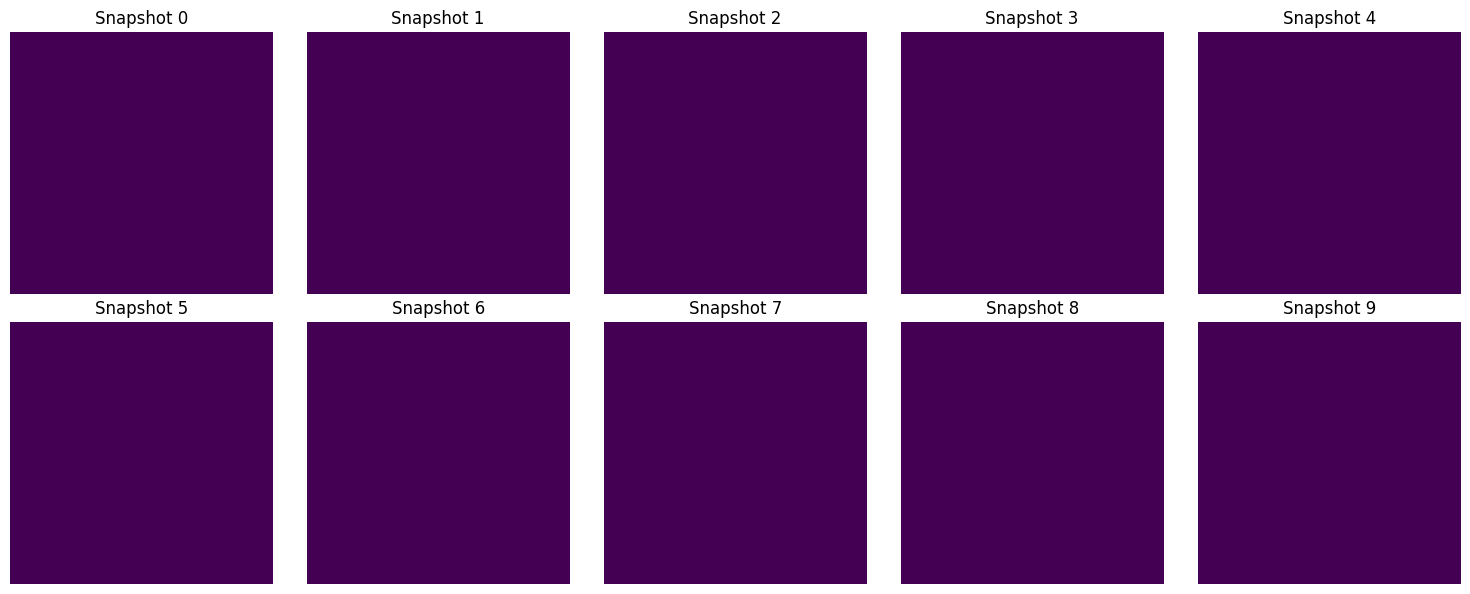

TypeError: list indices must be integers or slices, not tuple

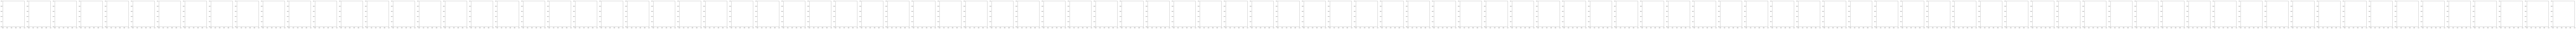

In [ ]:
import matplotlib.pyplot as plt

# Plot first few snapshots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_data[:, :, 0, i], cmap='viridis')
    ax.set_title(f"Snapshot {i}")
    ax.axis('off')
plt.tight_layout()
plt.show()

def plot_dmd_mode(mode_tensor, title="DMD Mode"):
    """Plot a single DMD mode (assumes mode_tensor is TTTensor)"""
    mode_array = mode_tensor#.to_array()  # Convert TT to full array
    num_channels = mode_array.shape[-1]

    fig, axes = plt.subplots(1, num_channels, figsize=(5 * num_channels, 5))
    if num_channels == 1:
        axes = [axes]
    for ch in range(num_channels):
        plt.imshow(mode_array[:, :, 1,ch], cmap='coolwarm')
        axes[ch].set_title(f"Channel {ch+1}")
        axes[ch].axis("off")
        fig.colorbar(im, ax=axes[ch])
        fig.suptitle(title)
        plt.tight_layout()
        plt.show()

# Plot top DMD modes
for i, phi in enumerate(phi_tensors):
    plot_dmd_mode(phi, title=f"DMD Mode {i+1}")
def plot_multiple_dmd_modes(phi_tensors, n_show=5):
    fig, axes = plt.subplots(n_show, 3, figsize=(15, 4 * n_show))
    for i in range(n_show):
        mode_array = phi_tensors[i].to_array()
        for ch in range(3):
            im = axes[i, ch].imshow(mode_array[:, :, ch], cmap='coolwarm')
            axes[i, ch].set_title(f"Mode {i+1}, Channel {ch+1}")
            axes[i, ch].axis("off")
            fig.colorbar(im, ax=axes[i, ch])
    plt.tight_layout()
    plt.show()

plot_multiple_dmd_modes(phi_tensors, n_show=3)
def plot_eigenvalues(lambda_vals, title="DMD Eigenvalues"):
    plt.figure(figsize=(6, 6))
    plt.scatter(lambda_vals.real, lambda_vals.imag, c=np.abs(lambda_vals), cmap='viridis', s=50)
    plt.xlabel("Real Part")
    plt.ylabel("Imaginary Part")
    plt.title(title)
    plt.grid(True)
    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)
    circle = plt.Circle((0, 0), 1, color='gray', linestyle='--', fill=False)
    plt.gca().add_patch(circle)
    plt.axis("equal")
    plt.show()

plot_eigenvalues(lambda_)

def plot_time_dynamics(W, lambda_vals, timesteps=100):
    dt = 1.0
    t = np.linspace(0, timesteps * dt, timesteps)
    modes_time = np.zeros((timesteps, W.shape[0]), dtype=complex)

    for i, lam in enumerate(lambda_vals):
        omega = np.log(lam) / dt
        modes_time[:, i] = np.exp(omega * t)

    plt.figure(figsize=(10, 4))
    for i in range(modes_time.shape[1]):
        plt.plot(t, modes_time[:, i].real, label=f"Mode {i+1}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.title("DMD Mode Time Evolution")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_time_dynamics(W, lambda_, timesteps=X_data.shape[-1]-1)

from tensorly import unfold

matricized = unfold(X_data, mode=-1)  # Shape: (100*100*3, m)

plt.figure(figsize=(10, 8))
plt.imshow(matricized, aspect='auto', cmap='viridis')
plt.title("Matricized Data (Spatial x Time)")
plt.xlabel("Time")
plt.ylabel("Flattened Spatial Dimensions")
plt.colorbar(label="Intensity")
plt.show()

Creating synthetic test data...
Test data created with shape: (80, 1000, 150)
Starting HODMD-TT Analysis
Input data shape: (80, 1000, 150)
Algorithm 1: TT Decomposition
TT decomposition successful with ranks: [(1, 80, 60), (60, 1000, 60), (60, 150, 1)]
Algorithm 2: Orthogonalization
Orthogonalization completed
Algorithm 3: Pseudo Inverse Computation
Pseudo inverse computed with effective rank: 60
Algorithm 4: DMD Computation
DMD computation completed with 6 modes
Eigenvalue magnitudes range: [0.808705, 0.999998]
Algorithm 5: Data Reconstruction
Reconstruction completed with relative error: 0.129909
Algorithm 6: Quality Assessment
Shape of original tensor: (80, 1000, 150)
Shape of reconstructed tensor: (80, 1000, 150)
Quality Statistics:
  Relative Error: 0.129909
  Energy Ratio: 0.973816
  Correlation: 0.991537
  Stable/Unstable Modes: 6/0


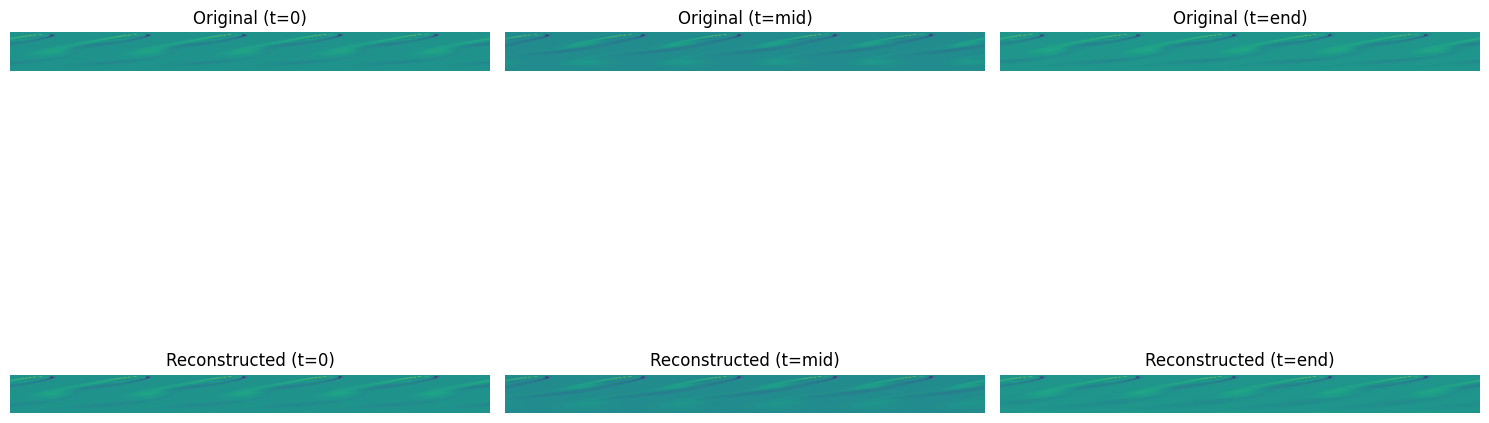

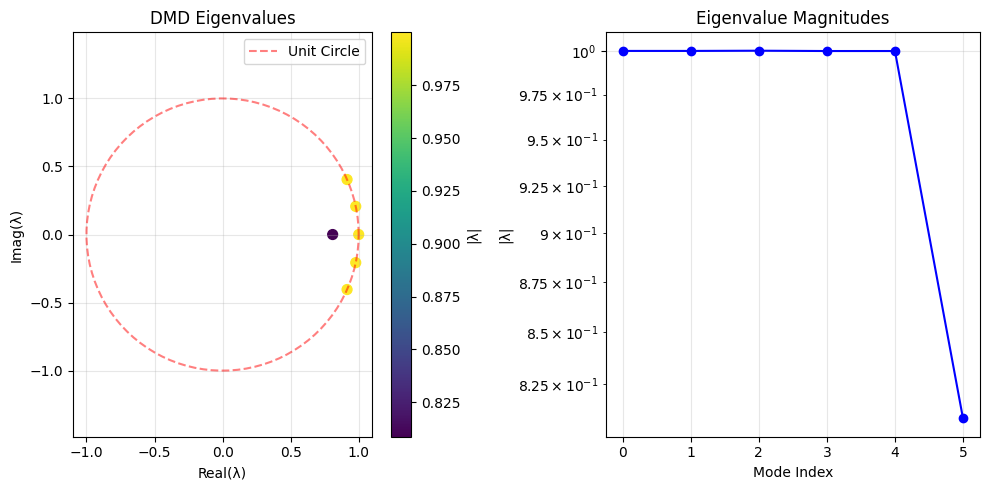


HODMD-TT Analysis Complete!


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd, qr, pinv
from scipy.sparse.linalg import eigs
import tensorly as tl
from tensorly.decomposition import tensor_train
import warnings
warnings.filterwarnings('ignore')

class HODMD_TT:
    """
    Higher-Order Dynamic Mode Decomposition using Tensor Train decomposition
    """
    
    def __init__(self, rank=None, svd_rank=None):
        """
        Initialize HODMD with TT decomposition
        
        Parameters:
        -----------
        rank : list or int
            TT ranks for decomposition
        svd_rank : int
            SVD rank for DMD computation
        """
        self.rank = rank
        self.svd_rank = svd_rank
        self.tt_cores = None
        self.dmd_modes = None
        self.eigenvalues = None
        self.reconstruction_error = None
        
    def tensorize_data(self, f):
        """
        Convert 3D data to tensor format
        
        Parameters:
        -----------
        f : np.ndarray
            Input data of shape (nx, ny, nt)
            
        Returns:
        --------
        tensor : np.ndarray
            Tensorized data
        """
        print(f"Input data shape: {f.shape}")
        return f
    
    def algorithm1_tt_decomposition(self, tensor):
        """
        Algorithm 1: Convert tensor into TT-format using low-rank decomposition
        
        Parameters:
        -----------
        tensor : np.ndarray
            Input tensor
            
        Returns:
        --------
        tt_cores : list
            List of TT cores
        """
        print("Algorithm 1: TT Decomposition")
        
        # Set default ranks if not provided
        if self.rank is None:
            # Adaptive rank selection based on tensor dimensions
            dims = tensor.shape
            max_rank = min(50, min(dims)//2)
            self.rank = [1] + [max_rank] * (len(dims)-1) + [1]
        
        # Perform TT decomposition using tensorly
        try:
            tt_tensor = tensor_train(tensor, rank=self.rank)
            self.tt_cores = tt_tensor.factors
            print(f"TT decomposition successful with ranks: {[core.shape for core in self.tt_cores]}")
            return self.tt_cores
        except Exception as e:
            print(f"TensorLy decomposition failed, using manual SVD-based approach: {e}")
            return self._manual_tt_decomposition(tensor)
    
    def _manual_tt_decomposition(self, tensor):
        """
        Manual TT decomposition using SVD
        """
        cores = []
        current_tensor = tensor.copy()
        
        for i in range(len(tensor.shape) - 1):
            # Reshape for SVD
            shape = current_tensor.shape
            matrix = current_tensor.reshape(shape[0], -1)
            
            # SVD
            U, s, Vt = svd(matrix, full_matrices=False)
            
            # Determine rank
            if isinstance(self.rank, list):
                r = min(self.rank[i+1], len(s))
            else:
                r = min(self.rank or 10, len(s))
            
            # Truncate
            U = U[:, :r]
            s = s[:r]
            Vt = Vt[:r, :]
            
            # Store core
            if i == 0:
                cores.append(U.reshape(1, shape[0], r))
            else:
                cores.append(U.reshape(U.shape[0], shape[0]//U.shape[0], r))
            
            # Update tensor for next iteration
            current_tensor = (np.diag(s) @ Vt).reshape((r,) + shape[1:])
        
        # Last core
        cores.append(current_tensor.reshape(current_tensor.shape + (1,)))
        
        self.tt_cores = cores
        print(f"Manual TT decomposition completed with {len(cores)} cores")
        return cores
    
    def algorithm2_orthogonalization(self, tt_cores):
        """
        Algorithm 2: Left and right orthogonalization of TT cores
        
        Parameters:
        -----------
        tt_cores : list
            List of TT cores
            
        Returns:
        --------
        left_ortho_cores : list
            Left-orthogonalized cores
        right_ortho_cores : list
            Right-orthogonalized cores
        """
        print("Algorithm 2: Orthogonalization")
        
        n_cores = len(tt_cores)
        left_ortho_cores = [None] * n_cores
        right_ortho_cores = [None] * n_cores
        
        # Left orthogonalization
        for i in range(n_cores - 1):
            core = tt_cores[i]
            r_left, n_i, r_right = core.shape
            
            # Reshape for QR decomposition
            matrix = core.reshape(r_left * n_i, r_right)
            Q, R = qr(matrix, mode='economic')
            
            # Update current core
            left_ortho_cores[i] = Q.reshape(r_left, n_i, Q.shape[1])
            
            # Update next core
            if i < n_cores - 1:
                next_core = tt_cores[i + 1]
                r_left_next, n_next, r_right_next = next_core.shape
                next_matrix = next_core.reshape(r_left_next, n_next * r_right_next)
                updated_next = R @ next_matrix
                tt_cores[i + 1] = updated_next.reshape(R.shape[0], n_next, r_right_next)
        
        left_ortho_cores[-1] = tt_cores[-1]
        
        # Right orthogonalization
        tt_cores_copy = [core.copy() for core in left_ortho_cores]
        
        for i in range(n_cores - 1, 0, -1):
            core = tt_cores_copy[i]
            r_left, n_i, r_right = core.shape
            
            # Reshape for QR decomposition
            matrix = core.reshape(r_left, n_i * r_right)
            Q, R = qr(matrix.T, mode='economic')
            Q = Q.T
            R = R.T
            
            # Update current core
            right_ortho_cores[i] = Q.reshape(Q.shape[0], n_i, r_right)
            
            # Update previous core
            if i > 0:
                prev_core = tt_cores_copy[i - 1]
                r_left_prev, n_prev, r_right_prev = prev_core.shape
                prev_matrix = prev_core.reshape(r_left_prev * n_prev, r_right_prev)
                updated_prev = prev_matrix @ R
                tt_cores_copy[i - 1] = updated_prev.reshape(r_left_prev, n_prev, R.shape[1])
        
        right_ortho_cores[0] = tt_cores_copy[0]
        
        print("Orthogonalization completed")
        return left_ortho_cores, right_ortho_cores
    
    def algorithm3_pseudo_inverse(self, left_cores, right_cores):
        """
        Algorithm 3: Pseudo inverse of matricization of TT-cores tensor
        
        Parameters:
        -----------
        left_cores : list
            Left-orthogonalized cores
        right_cores : list
            Right-orthogonalized cores
            
        Returns:
        --------
        pseudo_inv : np.ndarray
            Pseudo inverse matrix
        """
        print("Algorithm 3: Pseudo Inverse Computation")
        
        n_cores = len(left_cores)
        middle_idx = n_cores // 2
        
        # SVD on middle core
        middle_core = left_cores[middle_idx]
        r_left, n_i, r_right = middle_core.shape
        matrix = middle_core.reshape(r_left, n_i * r_right)
        
        U, s, Vt = svd(matrix, full_matrices=False)
        
        # Truncate based on svd_rank
        if self.svd_rank:
            rank = min(self.svd_rank, len(s))
            U = U[:, :rank]
            s = s[:rank]
            Vt = Vt[:rank, :]
        
        # Compute pseudo inverse
        s_inv = np.zeros_like(s)
        s_inv[s > 1e-12] = 1.0 / s[s > 1e-12]
        pseudo_inv = Vt.T @ np.diag(s_inv) @ U.T
        
        print(f"Pseudo inverse computed with effective rank: {np.sum(s > 1e-12)}")
        return pseudo_inv, U, s, Vt
    
    def algorithm4_dmd_computation(self, tensor, pseudo_inv_data):
        """
        Algorithm 4: Computation of DMD modes and eigenvalues in TT-format
        
        Parameters:
        -----------
        tensor : np.ndarray
            Original tensor
        pseudo_inv_data : tuple
            Pseudo inverse computation results
            
        Returns:
        --------
        eigenvalues : np.ndarray
            DMD eigenvalues
        modes : np.ndarray
            DMD modes
        """
        print("Algorithm 4: DMD Computation")
        
        pseudo_inv, U, s, Vt = pseudo_inv_data
        
        # Create data matrices for DMD
        nx, ny, nt = tensor.shape
        
        # Reshape tensor to matrix form for DMD
        X = tensor.reshape(nx * ny, nt)
        X1 = X[:, :-1]  # Data matrix
        X2 = X[:, 1:]   # Shifted data matrix
        
        # DMD computation
        # Compute A_tilde = U^T * X2 * X1^T * U * S^{-1}
        try:
            # SVD of X1 for better numerical stability
            U_x, s_x, Vt_x = svd(X1, full_matrices=False)
            
            # Truncate based on energy or rank
            energy_threshold = 0.99
            cumulative_energy = np.cumsum(s_x**2) / np.sum(s_x**2)
            effective_rank = np.argmax(cumulative_energy >= energy_threshold) + 1
            effective_rank = min(effective_rank, len(s_x))
            
            U_x = U_x[:, :effective_rank]
            s_x = s_x[:effective_rank]
            Vt_x = Vt_x[:effective_rank, :]
            
            # Compute reduced-order DMD
            A_tilde = U_x.T @ X2 @ Vt_x.T @ np.diag(1.0/s_x)
            
            # Eigendecomposition
            eigenvalues, eigenvectors = np.linalg.eig(A_tilde)
            
            # Compute DMD modes
            modes = X2 @ Vt_x.T @ np.diag(1.0/s_x) @ eigenvectors
            
            print(f"DMD computation completed with {len(eigenvalues)} modes")
            print(f"Eigenvalue magnitudes range: [{np.min(np.abs(eigenvalues)):.6f}, {np.max(np.abs(eigenvalues)):.6f}]")
            
        except Exception as e:
            print(f"Advanced DMD failed, using simple approach: {e}")
            # Fallback to simple DMD
            A_approx = X2 @ pinv(X1)
            eigenvalues, modes = eigs(A_approx, k=min(10, min(X1.shape)-1))
        
        self.eigenvalues = eigenvalues
        self.dmd_modes = modes
        
        return eigenvalues, modes
    
    def algorithm5_reconstruction(self, original_tensor, modes, eigenvalues, dt=1.0):
        """
        Algorithm 5: Reconstruction of data and visualization
        
        Parameters:
        -----------
        original_tensor : np.ndarray
            Original tensor data
        modes : np.ndarray
            DMD modes
        eigenvalues : np.ndarray
            DMD eigenvalues
        dt : float
            Time step
            
        Returns:
        --------
        reconstructed_tensor : np.ndarray
            Reconstructed tensor
        """
        print("Algorithm 5: Data Reconstruction")
        
        nx, ny, nt = original_tensor.shape
        
        # Time vector
        t = np.arange(nt) * dt
        
        # Compute time dynamics
        time_dynamics = np.zeros((len(eigenvalues), nt), dtype=complex)
        for i, lam in enumerate(eigenvalues):
            time_dynamics[i, :] = np.power(lam, t)
        
        # Initial conditions (project first snapshot onto modes)
        X_flat = original_tensor.reshape(nx * ny, nt)
        b = pinv(modes) @ X_flat[:, 0]
        
        # Reconstruct
        X_dmd = modes @ np.diag(b) @ time_dynamics
        
        # Take real part and reshape
        X_reconstructed = np.real(X_dmd).reshape(nx, ny, nt)
        
        # Compute reconstruction error
        self.reconstruction_error = np.linalg.norm(original_tensor - X_reconstructed) / np.linalg.norm(original_tensor)
        
        print(f"Reconstruction completed with relative error: {self.reconstruction_error:.6f}")
        
        return X_reconstructed
    
    def algorithm6_statistics(self, original_tensor, reconstructed_tensor):
        """
        Algorithm 6: Statistics to assess reconstruction quality
        
        Parameters:
        -----------
        original_tensor : np.ndarray
            Original tensor
        reconstructed_tensor : np.ndarray
            Reconstructed tensor
            
        Returns:
        --------
        stats : dict
            Dictionary containing various quality metrics
        """
        print("Algorithm 6: Quality Assessment")
        
        # Various error metrics
        print(f"Shape of original tensor: {original_tensor.shape}")
        print(f"Shape of reconstructed tensor: {reconstructed_tensor.shape}")
        frobenius_error = np.linalg.norm(original_tensor - reconstructed_tensor)
        relative_error = frobenius_error / np.linalg.norm(original_tensor)
        
        # Energy preservation
        original_energy = np.sum(original_tensor**2)
        reconstructed_energy = np.sum(reconstructed_tensor**2)
        energy_ratio = reconstructed_energy / original_energy
        
        # Correlation coefficient
        orig_flat = original_tensor.flatten()
        recon_flat = reconstructed_tensor.flatten()
        correlation = np.corrcoef(orig_flat, recon_flat)[0, 1]
        
        # Eigenvalue analysis
        stable_modes = np.sum(np.abs(self.eigenvalues) <= 1.0)
        unstable_modes = np.sum(np.abs(self.eigenvalues) > 1.0)
        
        stats = {
            'frobenius_error': frobenius_error,
            'relative_error': relative_error,
            'energy_ratio': energy_ratio,
            'correlation': correlation,
            'stable_modes': stable_modes,
            'unstable_modes': unstable_modes,
            'total_modes': len(self.eigenvalues),
            'effective_rank': np.sum(np.abs(self.eigenvalues) > 1e-10)
        }
        
        print(f"Quality Statistics:")
        print(f"  Relative Error: {relative_error:.6f}")
        print(f"  Energy Ratio: {energy_ratio:.6f}")
        print(f"  Correlation: {correlation:.6f}")
        print(f"  Stable/Unstable Modes: {stable_modes}/{unstable_modes}")
        
        return stats
    
    def fit(self, f):
        """
        Complete HODMD-TT pipeline
        
        Parameters:
        -----------
        f : np.ndarray
            Input tensor of shape (nx, ny, nt)
            
        Returns:
        --------
        reconstructed : np.ndarray
            Reconstructed tensor
        stats : dict
            Quality statistics
        """
        print("Starting HODMD-TT Analysis")
        print("=" * 50)
        
        # Algorithm 1: TT Decomposition
        tensor = self.tensorize_data(f)
        tt_cores = self.algorithm1_tt_decomposition(tensor)
        
        # Algorithm 2: Orthogonalization
        left_cores, right_cores = self.algorithm2_orthogonalization(tt_cores)
        
        # Algorithm 3: Pseudo Inverse
        pseudo_inv_data = self.algorithm3_pseudo_inverse(left_cores, right_cores)
        
        # Algorithm 4: DMD Computation
        eigenvalues, modes = self.algorithm4_dmd_computation(tensor, pseudo_inv_data)
        
        # Algorithm 5: Reconstruction
        reconstructed = self.algorithm5_reconstruction(tensor, modes, eigenvalues)
        
        # Algorithm 6: Statistics
        stats = self.algorithm6_statistics(tensor, reconstructed)
        
        return reconstructed, stats
    
    def visualize_results(self, original, reconstructed, stats):
        """
        Visualize the results
        """
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        
        # Original data snapshots
        axes[0, 0].imshow(original[:, :, 0], cmap='viridis')
        axes[0, 0].set_title('Original (t=0)')
        axes[0, 0].axis('off')
        
        axes[0, 1].imshow(original[:, :, original.shape[2]//2], cmap='viridis')
        axes[0, 1].set_title('Original (t=mid)')
        axes[0, 1].axis('off')
        
        axes[0, 2].imshow(original[:, :, -1], cmap='viridis')
        axes[0, 2].set_title('Original (t=end)')
        axes[0, 2].axis('off')
        
        # Reconstructed data snapshots
        axes[1, 0].imshow(reconstructed[:, :, 0], cmap='viridis')
        axes[1, 0].set_title('Reconstructed (t=0)')
        axes[1, 0].axis('off')
        
        axes[1, 1].imshow(reconstructed[:, :, reconstructed.shape[2]//2], cmap='viridis')
        axes[1, 1].set_title('Reconstructed (t=mid)')
        axes[1, 1].axis('off')
        
        axes[1, 2].imshow(reconstructed[:, :, -1], cmap='viridis')
        axes[1, 2].set_title('Reconstructed (t=end)')
        axes[1, 2].axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Eigenvalue plot
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.scatter(np.real(self.eigenvalues), np.imag(self.eigenvalues), 
                   c=np.abs(self.eigenvalues), cmap='viridis', s=50)
        plt.colorbar(label='|λ|')
        plt.xlabel('Real(λ)')
        plt.ylabel('Imag(λ)')
        plt.title('DMD Eigenvalues')
        plt.grid(True, alpha=0.3)
        
        # Unit circle
        theta = np.linspace(0, 2*np.pi, 100)
        plt.plot(np.cos(theta), np.sin(theta), 'r--', alpha=0.5, label='Unit Circle')
        plt.legend()
        plt.axis('equal')
        
        plt.subplot(1, 2, 2)
        plt.semilogy(np.abs(self.eigenvalues), 'bo-')
        plt.xlabel('Mode Index')
        plt.ylabel('|λ|')
        plt.title('Eigenvalue Magnitudes')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

# Example usage and test
def create_test_data():
    """Create synthetic spatiotemporal data for testing"""
    print("Creating synthetic test data...")
    
    # Spatial grid
    # x = np.linspace(0, 4*np.pi, 20)
    # y = np.linspace(0, 4*np.pi, 20)
    # X, Y = np.meshgrid(x, y)
    
    # # Time vector
    # t = np.linspace(0, 10, 1000)
    
    # # Create tensor data with multiple modes
    # f = np.zeros((20, 20, 1000))
    
    # # Mode 1: Traveling wave
    # for i, time in enumerate(t):
    #     f[:, :, i] += np.sin(X - 0.5*time) * np.cos(Y)
    
    # # Mode 2: Decaying oscillation
    # for i, time in enumerate(t):
    #     f[:, :, i] += 0.5 * np.exp(-0.1*time) * np.cos(2*X + time) * np.sin(Y)
    
    # # Mode 3: Growing instability (small amplitude)
    # for i, time in enumerate(t):
    #     f[:, :, i] += 0.1 * np.exp(0.05*time) * np.sin(X + Y + 2*time)
    
    # # Add some noise
    # f += 0.05 * np.random.randn(*f.shape)
    from scipy import io 
    vortal_matt = io.loadmat('../dataset/VORTALL.mat')
    f = vortal_matt['VORTALL'][:80000,:150].reshape(80,1000,150)
    print(f"Test data created with shape: {f.shape}")
    return f

# Run example

if __name__ == "__main__":
    # Create test data
    # Create your data (20×20×1000 tensor)


    test_data = create_test_data()
    
    # Initialize HODMD-TT
    hodmd = HODMD_TT(rank=60, svd_rank=100)
    
    # Fit the model
    reconstructed_data, quality_stats = hodmd.fit(test_data)
    
    # Visualize results
    hodmd.visualize_results(test_data, reconstructed_data, quality_stats)
    
    print("\nHODMD-TT Analysis Complete!")
    print("=" * 50)

In [30]:

import pydmd
from scipy import io 
reconstructed_data = reconstructed_data.reshape(80*1000, 150)
vortal_matt = io.loadmat('../dataset/VORTALL.mat')
X = vortal_matt['VORTALL'][:80000,:150]
dmd = pydmd.HODMD(svd_rank=100, exact=True, opt=True)
dmd.fit(X)

print(dmd.reconstructed_data.shape)
print(np.linalg.norm(dmd.reconstructed_data - reconstructed_data))
print(np.linalg.norm(dmd.reconstructed_data - X))
print(np.linalg.norm(reconstructed_data - X))


(80000, 150)
526.2997495552258
0.005525080172117079
526.2997502716257
